In [2]:
%load_ext autoreload
%autoreload 2

Exploratory notebook to understand the data that is in the cleaned version from unipi.it.

It seems to be only for adults (for which the study found significant average effects), so it excludes the youth part of the data, and also not hold all variables considered in the paper (e.g. afdc, which seemed to matter for the results in their subgroup analysis). I might join this later based on the raw data.

In [9]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style="whitegrid")
sns.set_context("paper")
plt.style.use('seaborn-whitegrid')

/var/folders/yx/_8fch6cj6w5cfvy2xlfjrsyw0000gn/T/ipykernel_14471/1575769064.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [4]:
np.random.seed(234)

### Exploration

In [5]:
path_to_raw_file = "../../../Data/JTPA_clean/jtpa_source.csv"
df = pd.read_csv(path_to_raw_file)
df.head()

,recid,radate,assignmt,site,training,afdc,sex,class_tr,ojt_jsa,oth_serv,...,hsorged,black,hispanic,age2225,age2629,age3035,age3644,age4554,f2sms,wkless13
0,300001,05/16/89,1,NE,1,0,0,0,0,1,...,1.0,1,0,0,0,0,0,1,0,1.0
1,300002,08/30/89,1,LC,1,0,0,0,0,1,...,1.0,0,0,1,0,0,0,0,0,0.0
2,300006,08/18/88,1,HF,0,0,0,1,0,0,...,1.0,0,1,0,0,1,0,0,0,1.0
3,300008,03/08/89,1,IN,0,0,0,0,1,0,...,1.0,0,0,0,0,1,0,0,0,0.0
4,300010,11/16/88,0,CV,0,0,0,0,1,0,...,0.0,0,0,1,0,0,0,0,0,0.0


In [6]:
df.shape

(11204, 26)

The data includes around 11.200 records, a subset of the total 21,000 experiment (which also includes out of school youths not present here).

In [7]:
# set index to recid
df.set_index('recid', inplace=True)

In [7]:
print(df.columns.values)

['radate' 'assignmt' 'site' 'training' 'afdc' 'sex' 'class_tr' 'ojt_jsa'
 'oth_serv' 'bdate' 'age' 'earnings' 'prevearn' 'married' 'pbhous'
 'hsorged' 'black' 'hispanic' 'age2225' 'age2629' 'age3035' 'age3644'
 'age4554' 'f2sms' 'wkless13']


**Variable Definitions:**
- recid = Unique person identification code
- radate = Date of random assignment
- assgnmt = Assignment to training (1=Treatment,0=Control)
- site = Code identifying 1 of 16 sites
- training = Enrollment in training (1=Enrolled,0=Not Enrolled)
- sex =Gender(1=Male,0=Female)
- class tr = Assessed for Classroom Training
- ojt jsa = Assessed for On-the-job Training
- oth serv = Assessed for Other Services
- bdate = Date of birth
- age = Age in years at random assignment
- earnings = Total earnings over 30 months following random assignment
- prevearn = Earnings in year prior to random assignment
- married = 1 if Married and living with spouse, = 0 Otherwise
- hsorged = 1 if has HS Diploma or GED, = 0 Otherwise
- black = 1 if African American, = 0 Otherwise
- hispanic = 1 if Hispanic,= 0 Otherwise

**Missing in the file description but present in the data**
- afdc (Aid to Families with Dependent Children) = 1 if received, 0 otherwise
- wkless13 = worked less than 13 weeks in past (year?)
- *f2sms = ??*


In [8]:
# get summary stats
df.describe()

,assignmt,training,afdc,sex,class_tr,ojt_jsa,oth_serv,age,earnings,prevearn,...,hsorged,black,hispanic,age2225,age2629,age3035,age3644,age4554,f2sms,wkless13
count,11204.000000,11204.000000,11204.000000,11204.000000,11204.000000,11204.000000,11204.000000,11204.000000,11204.000000,11204.000000,...,11204.000000,11204.000000,11204.000000,11204.000000,11204.000000,11204.000000,11204.000000,11204.000000,11204.000000,11204.000000
mean,0.668243,0.433595,0.186898,0.455373,0.301410,0.433327,0.265262,33.142628,15815.287397,3202.305405,...,0.708101,0.259639,0.109336,0.235452,0.204213,0.242235,0.196358,0.082381,0.273652,0.464297
std,0.470865,0.495593,0.389847,0.498027,0.458891,0.495557,0.441493,9.637582,16767.046015,3901.445694,...,0.440195,0.438456,0.312074,0.424300,0.403143,0.428455,0.397260,0.274957,0.445852,0.472101
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,1929.750000,98.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000,11010.000000,2444.656000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.407336
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,38.000000,24798.250000,4103.911000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,78.000000,155760.000000,63000.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.dtypes

radate       object
assignmt      int64
site         object
training      int64
afdc          int64
sex           int64
class_tr      int64
ojt_jsa       int64
oth_serv      int64
bdate        object
age           int64
earnings      int64
prevearn    float64
married     float64
pbhous      float64
hsorged     float64
black         int64
hispanic      int64
age2225       int64
age2629       int64
age3035       int64
age3644       int64
age4554       int64
f2sms         int64
wkless13    float64
dtype: object

There appear to be some data issues, some binary variables are not 0 or 1....

In [10]:
df.married.value_counts()

married
0.000000    7495
1.000000    2945
0.211161     517
0.335285     247
Name: count, dtype: int64

In [11]:
df.pbhous.value_counts()

pbhous
0.000000    10025
1.000000      950
0.064312      117
0.115307      112
Name: count, dtype: int64

In [12]:
df.hsorged.value_counts()

hsorged
1.000000    7445
0.000000    3064
0.716404     370
0.687677     325
Name: count, dtype: int64

In [8]:
# how many columns have ANY of the binaries be corrupt, i.e. not 0 or 1
dodgy_cols = ['married', 'pbhous', 'hsorged']
dodgy_df = df[~df[dodgy_cols].apply(lambda x: x.isin([0, 1])).all(axis=1)]
dodgy_df.shape

(1461, 25)

I decide to drop them...

In [9]:
df_orig = df.copy()
df = df[~df.index.isin(dodgy_df.index)]

In [10]:
df.shape

(9743, 25)

In [16]:
# save the (cleaned) cleaned data
df.to_csv('jtpa_doubleclean.csv')

In [47]:
# binary features
binary_features = df.loc[:,df.max()==1].columns.values
binary_features

array(['assignmt', 'training', 'afdc', 'sex', 'class_tr', 'ojt_jsa',
       'oth_serv', 'married', 'pbhous', 'hsorged', 'black', 'hispanic',
       'age2225', 'age2629', 'age3035', 'age3644', 'age4554', 'f2sms',
       'wkless13'], dtype=object)

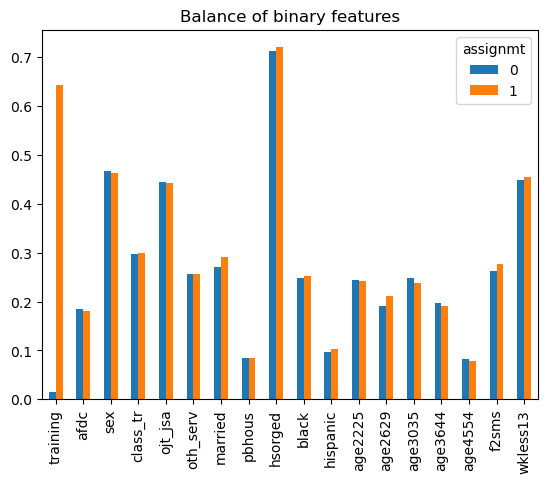

In [17]:
# get balance of features by assignment
df[binary_features].groupby('assignmt').mean().T.plot(kind="bar")
plt.title("Balance of binary features")
plt.show()


In [18]:
continuous_features = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col not in binary_features]
continuous_features

['age', 'earnings', 'prevearn']

In [19]:
df[continuous_features + ["assignmt"]].groupby('assignmt').mean()

,age,earnings,prevearn
assignmt,,,
0,33.13573,15355.350790,3341.921104
1,32.96593,16502.691222,3252.071102


In [22]:
df = pd.read_csv('jtpa_doubleclean.csv')

In [23]:
# latex table
features = ['afdc', 'sex', 'married', 'pbhous', 'hsorged', 'black', 'hispanic', 'wkless13','age', 'prevearn']
features_str = ["welfare", "sex", "married", "public housing", "high school", "black", "hispanic", "unemployed", "age", "previous earnings"]

df_fancy = df.rename(columns=dict(zip(features, features_str)))
df_fancy.head()

,recid,radate,assignmt,site,training,welfare,sex,class_tr,ojt_jsa,oth_serv,...,high school,black,hispanic,age2225,age2629,age3035,age3644,age4554,f2sms,unemployed
0,300001,05/16/89,1,NE,1,0,0,0,0,1,...,1.0,1,0,0,0,0,0,1,0,1.0
1,300002,08/30/89,1,LC,1,0,0,0,0,1,...,1.0,0,0,1,0,0,0,0,0,0.0
2,300006,08/18/88,1,HF,0,0,0,1,0,0,...,1.0,0,1,0,0,1,0,0,0,1.0
3,300008,03/08/89,1,IN,0,0,0,0,1,0,...,1.0,0,0,0,0,1,0,0,0,0.0
4,300012,04/26/88,1,JK,1,0,1,0,1,0,...,1.0,1,0,1,0,0,0,0,1,1.0


In [7]:
latex_table = df_fancy[features_str + ["assignmt", "training"]].groupby('assignmt').mean().T.round(2).to_latex(float_format="%.2f")
latex_table

'\\begin{tabular}{lrr}\n\\toprule\nassignmt & 0 & 1 \\\\\n\\midrule\nwelfare & 0.19 & 0.18 \\\\\nsex & 0.47 & 0.46 \\\\\nmarried & 0.27 & 0.29 \\\\\npublic housing & 0.08 & 0.08 \\\\\nhigh school & 0.71 & 0.72 \\\\\nblack & 0.25 & 0.25 \\\\\nhispanic & 0.10 & 0.10 \\\\\nunemployed & 0.45 & 0.46 \\\\\nage & 33.14 & 32.97 \\\\\nprevious earnings & 3341.92 & 3252.07 \\\\\ntraining & 0.02 & 0.64 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [8]:
# save to file
with open("balanced_features.tex", "w") as f:
    f.write(latex_table)

### Recreating the survey results

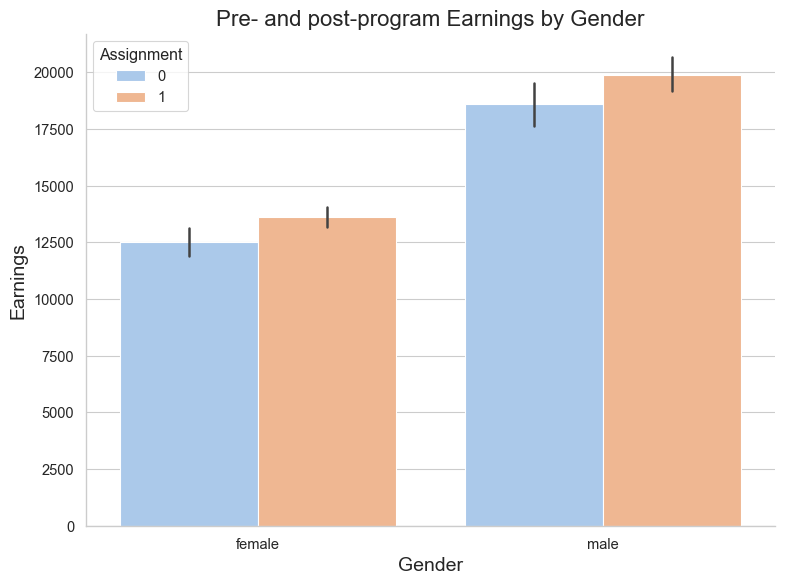

In [22]:
# Set the style for seaborn
sns.set(style="whitegrid", context="paper", palette="pastel", font_scale=1.2, rc={"figure.figsize": (8,6)})

# Create a new column for gender as a string
df["sex_str"] = df.sex.map({0:"female", 1:"male"})

# Create the barplot
barplot = sns.barplot(x='sex_str', y='earnings', hue="assignmt", data=df)

# Set the title and labels
barplot.set_title("Pre- and post-program Earnings by Gender", fontsize=16)
barplot.set_xlabel("Gender", fontsize=14)
barplot.set_ylabel("Earnings", fontsize=14)

# Move the legend to an appropriate position
plt.legend(title='Assignment', loc='upper right', frameon=True)

# Optional: Remove the top and right spines
sns.despine()

# Tight layout often improves the spacing between subplots
plt.tight_layout()

# Save the plot as a high-resolution image file for inclusion in LaTeX
#plt.savefig('earnings_by_gender.pdf', format='pdf', dpi=400)

# position legend in top left
plt.legend(title='Assignment', loc='upper left', frameon=True)

# Show the plot
plt.show()

In the paper, they measure "impact per assignee" by taking the difference between mean outcomes for the treatment and control groups. To reduce the SE of this estimate, the differences were regression adjusted for variation in individual background characteristics. Since they are very balanced, this did not change point estimates thanks to random assignment.

In [23]:
# get inference on the coefficients
import statsmodels.api as sm

# fit a linear regression model
y = df.earnings
X = df[features + ["assignmt"]]
# add constant
X = sm.add_constant(X)

# run statsmodel
model = sm.OLS(y,X)
results = model.fit(cov_type='HC0') # robust standard errors (replicating their procedure)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               earnings   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     109.6
Date:                Fri, 03 May 2024   Prob (F-statistic):          4.70e-237
Time:                        14:38:24   Log-Likelihood:            -1.0792e+05
No. Observations:                9743   AIC:                         2.159e+05
Df Residuals:                    9731   BIC:                         2.160e+05
Df Model:                          11                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.22e+04    772.456     15.791      0.000    1.07e+04    1.37e+04
afdc       -1529.0315    393.832     -3.882      0.000   -2300.928    -757.135
sex         3472.4117    344.684     10.074      0.000    2796.843    4147.981
married     2615.5068    394.507      6.630      0.000    1842.287    3388.727
pbhous     -1334.5300    515.508     -2.589      0.010   -2344.907    -324.153
hsorged     3277.9828    334.060      9.813      0.000    2623.238    3932.727
black      -1368.9139    378.001     -3.621      0.000   -2109.783    -628.045
hispanic     125.6934    514.625      0.244      0.807    -882.953    1134.340
wkless13   -1933.3914    435.811     -4.436      0.000   -2787.564   -1079.218
age         -107.5285     15.320     -7.019      0.000    -137.555     -77.502
prevearn       1.0894      0.077     14.181      0.000       0.939       1.240
assignmt    1185.0208    331.251      3.577      0.000     535.781    1834.260
==============================================================================
Omnibus:                     2403.968   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6943.531
Skew:                           1.289   Prob(JB):                         0.00
Kurtosis:                       6.233   Cond. No.                     2.70e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 2.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# rum model separate for men and women (as in paper)
features_no_sex = features.copy()
features_no_sex.remove("sex")

# male
y_m = df[df["sex"]==1].earnings
X_m = df[df["sex"]==1][features_no_sex + ["assignmt"]]
X_m = sm.add_constant(X_m)

model_m = sm.OLS(y_m,X_m)
results_m = model_m.fit(cov_type='HC0') # robust standard errors (replicating their procedure)
results_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               earnings   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     51.01
Date:                Fri, 03 May 2024   Prob (F-statistic):           1.35e-97
Time:                        14:38:24   Log-Likelihood:                -50788.
No. Observations:                4521   AIC:                         1.016e+05
Df Residuals:                    4510   BIC:                         1.017e+05
Df Model:                          10                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.682e+04   1244.146     13.518      0.000    1.44e+04    1.93e+04
afdc       -1731.2834   1228.306     -1.409      0.159   -4138.720     676.153
married     5039.1388    654.007      7.705      0.000    3757.309    6320.969
pbhous     -1193.2191   1086.068     -1.099      0.272   -3321.873     935.435
hsorged     3277.5878    573.028      5.720      0.000    2154.474    4400.702
black      -2247.0954    634.782     -3.540      0.000   -3491.245   -1002.946
hispanic    1198.9141    933.986      1.284      0.199    -631.665    3029.494
wkless13   -1239.9647    690.393     -1.796      0.072   -2593.111     113.182
age         -186.0206     26.595     -6.994      0.000    -238.147    -133.895
prevearn       1.1638      0.104     11.155      0.000       0.959       1.368
assignmt    1332.9602    568.131      2.346      0.019     219.444    2446.477
==============================================================================
Omnibus:                     1002.376   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2396.836
Skew:                           1.228   Prob(JB):                         0.00
Kurtosis:                       5.588   Cond. No.                     3.12e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 3.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In the paper they find a difference of 978 (controlling perhaps for slightly different characteristics).

In [25]:
# female
y_f = df[df["sex"]==0].earnings
X_f = df[df["sex"]==0][features_no_sex + ["assignmt"]]
X_f = sm.add_constant(X_f)

model_f = sm.OLS(y_f,X_f)
results_f = model_f.fit(cov_type='HC0') # robust standard errors (replicating their procedure)
results_f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               earnings   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     59.01
Date:                Fri, 03 May 2024   Prob (F-statistic):          8.37e-114
Time:                        14:38:24   Log-Likelihood:                -56772.
No. Observations:                5222   AIC:                         1.136e+05
Df Residuals:                    5211   BIC:                         1.136e+05
Df Model:                          10                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.244e+04    858.981     14.485      0.000    1.08e+04    1.41e+04
afdc       -2551.2227    414.586     -6.154      0.000   -3363.797   -1738.649
married     -405.6243    449.162     -0.903      0.366   -1285.966     474.718
pbhous     -1653.0497    521.903     -3.167      0.002   -2675.962    -630.138
hsorged     3288.6850    357.624      9.196      0.000    2587.755    3989.615
black       -479.8688    430.646     -1.114      0.265   -1323.920     364.182
hispanic    -650.9870    551.544     -1.180      0.238   -1731.993     430.019
wkless13   -2478.6168    491.385     -5.044      0.000   -3441.713   -1515.521
age          -56.0892     17.601     -3.187      0.001     -90.587     -21.591
prevearn       0.8113      0.087      9.369      0.000       0.642       0.981
assignmt    1009.1879    369.754      2.729      0.006     284.484    1733.892
==============================================================================
Omnibus:                     1113.517   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2555.918
Skew:                           1.202   Prob(JB):                         0.00
Kurtosis:                       5.444   Cond. No.                     2.15e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 2.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For women they find 1176$ in the paper, so this is very close.

For both genders, the average effect of assignment to JPTA on earnings is statistically significant.

In [26]:
# creating joint latex table
from statsmodels.iolib.summary2 import summary_col

# regressor order
regressor_order = ['const', 'assignment'] + features

regression_table = summary_col([results, results_f, results_m], stars=True, float_format='%0.2f',
                               model_names=['Joint', 'Female', 'Male'],
                               regressor_order=regressor_order,
                               info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}",
                                          'No. observations' : lambda x: f"{int(x.nobs)}"})

# Convert to LaTeX
latex_regression_table = regression_table.as_latex()

# or write to a file
with open('regression_tables.tex', 'w') as file:
    file.write(latex_regression_table)

### Hetereogeneous treatment effects

Now I will turn to estimation of CATEs using first TOTs via sklearns RandomForest and then true Causal Forests by the econML library.

I will fit ensembles on the entire adult sample at once, and use sex as a feature rather than fitting separate models. This creates an overall better model fit, and allows us to look at the attribution of sex for individual instances.

#### Transformed outcome tree

Let's start with a simple transformed outcome tree.

Note that these transformed outcome trees are:
- noisy (they do not use the assignment information optimally) (PNAS, 2016)
- adaptive (they do not satisfy the "honest" requirement for a better MSE and correct inferential properties) (JASA, 2018)

In [27]:
# probability of random assignment:
df.assignmt.mean()

0.6687878476855178

Since assignment is truly random, we do not have to compute a propensity score, which would introduce further adverse consequences for the quality of the estimate unless tackled using e.g. doubly robust methods.

Here we can simply compute the transformed earnings outcome via:

$$
Y_i^* = Y_i \frac{W_i - p}{p(1-p)}
$$

The nice thing about this trick is that we have:

$$
\mathbb{E}[Y_i^* | X_i = x_i] = \tau(x_i)
$$

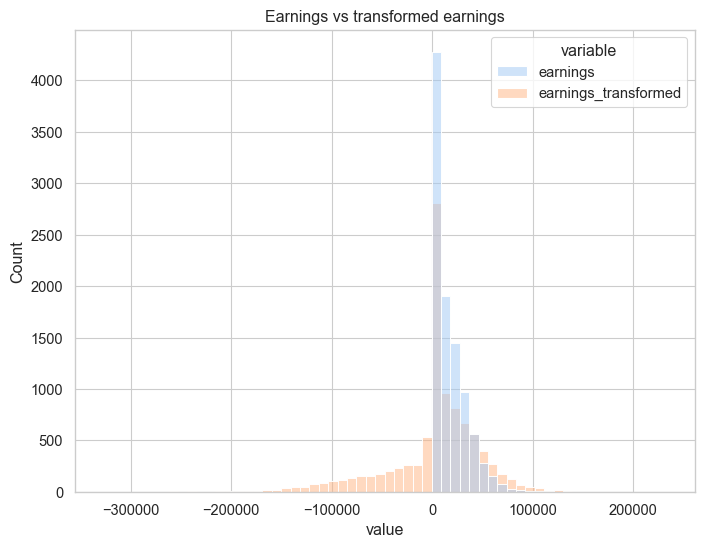

In [28]:
# compute transformed outcome
p = df.assignmt.mean()
df["earnings_transformed"] = (df.earnings*(df.assignmt - p))/(p*(1-p))

# plot earnings against transformed earnings
earnings_df = df[["earnings", "earnings_transformed"]].melt()
sns.histplot(earnings_df, x="value", hue="variable", bins = 60)
plt.title("Earnings vs transformed earnings")
plt.show()

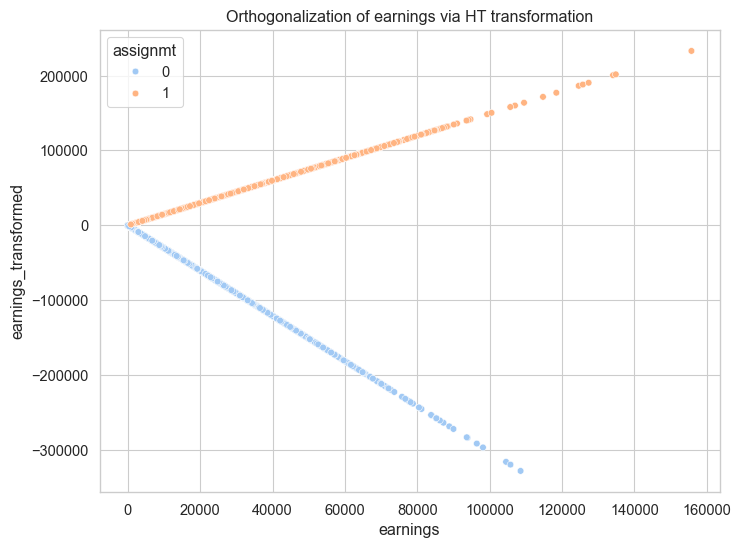

In [29]:
sns.scatterplot(x="earnings", y="earnings_transformed", hue="assignmt", data=df)
plt.title("Orthogonalization of earnings via HT transformation")
plt.show()

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define model
# I impose min_samples_leaf = 4 to somewhat smooth the regression
# this also helps with the bias created by adaptive vs. honest fitting 
model = RandomForestRegressor(min_samples_leaf=4)
X = df[features] # no assignment
y = df.earnings_transformed

# define param grid
param_grid = {'n_estimators': [20, 50, 100, 200],
              'max_depth': [2, 3, 5, 10, 15, 20]}

# define grid search
grid_search = GridSearchCV(model, param_grid, cv=4, n_jobs=-1, verbose=1)
grid_search.fit(X, y)

# get best estimator
print(grid_search.best_params_)
best_model = grid_search.best_estimator_

Fitting 4 folds for each of 24 candidates, totalling 96 fits
{'max_depth': 2, 'n_estimators': 50}


In [31]:
# look at grid results
results_df = pd.DataFrame(grid_search.cv_results_)
results_df.sort_values("rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
1,0.098700,0.012492,0.002173,0.000103,2,50,"{'max_depth': 2, 'n_estimators': 50}",-0.001178,0.004742,0.002829,-0.004574,0.000455,0.003604,1
3,0.365048,0.019580,0.010530,0.004350,2,200,"{'max_depth': 2, 'n_estimators': 200}",-0.006261,0.005174,0.001598,-0.006021,-0.001377,0.004929,2
2,0.190366,0.011900,0.003382,0.000235,2,100,"{'max_depth': 2, 'n_estimators': 100}",-0.004333,0.005327,0.000284,-0.007011,-0.001433,0.004695,3
0,0.045420,0.005519,0.002953,0.001445,2,20,"{'max_depth': 2, 'n_estimators': 20}",-0.005880,0.001765,0.001985,-0.004497,-0.001657,0.003566,4
4,0.060333,0.006071,0.001993,0.000959,3,20,"{'max_depth': 3, 'n_estimators': 20}",-0.005356,0.005876,0.000012,-0.007493,-0.001740,0.005178,5


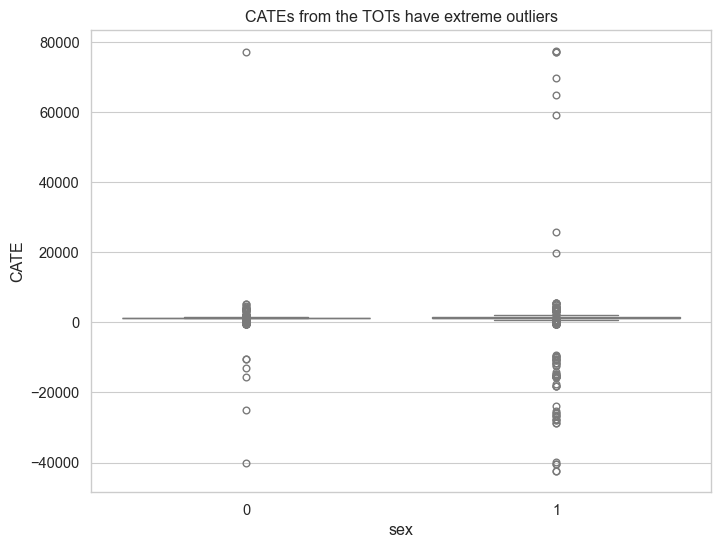

In [32]:
# get CATE and plot distribution
df["CATE"] = best_model.predict(X)
sns.boxplot(x="sex", y="CATE", data=df)
plt.title("CATEs from the TOTs have extreme outliers")
plt.show()

For the sake of exposition, lets focus on heterogeneity within +- 15.000 of the ATEs estimated above.

In [33]:
# range
r = 5000
# get subset
df_sub = df[(df.CATE>(1170-r)) & (df.CATE<(1170+r))]
df_sub.shape

(9680, 28)

In [34]:
# get new "background" dataset
X_sub = df_sub[features]

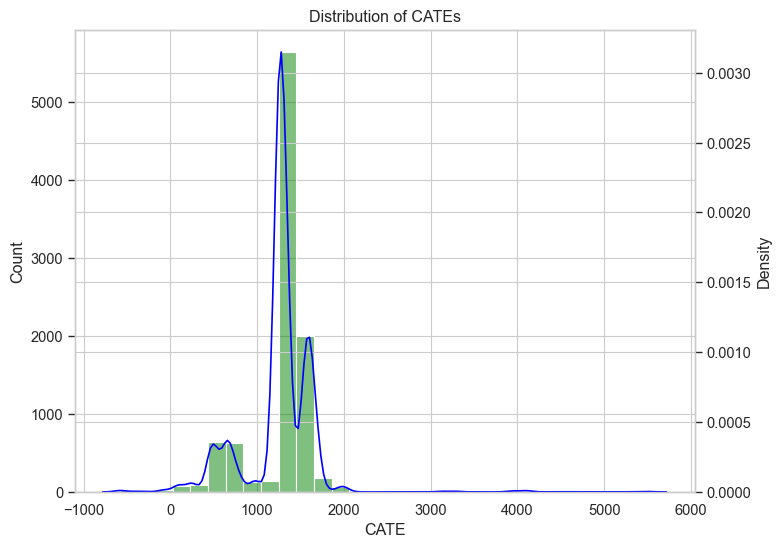

In [35]:
# Create a figure and a single axis
fig, ax1 = plt.subplots()

# Plot the KDE on the first axis
sns.histplot(data=df_sub, x="CATE", ax=ax1, color='green', alpha=0.5, bins = 30)

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot the histogram on the second axis
sns.kdeplot(data=df_sub, x="CATE", ax=ax2, color='blue')

# Show the plot
plt.title("Distribution of CATEs")
plt.show()

Very interestingly, we can see a bimodal distribution! Now the central question is: which features are driving the splits behind these two peaks? This is where SHAP comes in.

In [36]:
from shap.explainers import _tree # imports local fork

init from local version!
imported from folder


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [37]:
tot_treeExplainer = _tree.TreeExplainer(best_model, data = X_sub)
tot_treeExplainer.model.get_transform() # personal check

'identity'

In [38]:
tot_SHAP = tot_treeExplainer(X_sub)

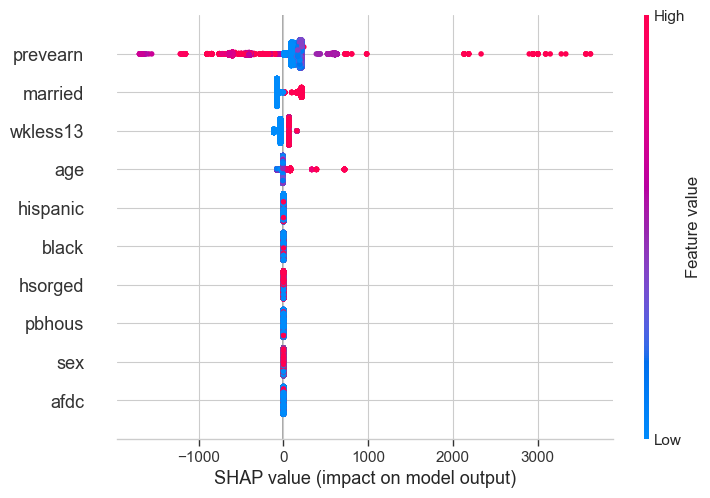

In [39]:
import shap

shap.plots.beeswarm(tot_SHAP)

There are two key takeaways:
- marriage is a key driver of the bimodal distribution of CATEs.
- High previous earnings can (interventionally) cause both very high and low CATEs.

Shap interaction values are only defined for observational SHAP. Let's try this.

In [40]:
# tree Explainer
tot_treeExplainer_tpd = shap.TreeExplainer(best_model, feature_perturbation="tree_path_dependent")
tot_SHAP_tpd = tot_treeExplainer_tpd(X_sub)
tot_SHAP_interactions_tpd = tot_treeExplainer_tpd.shap_interaction_values(X_sub)

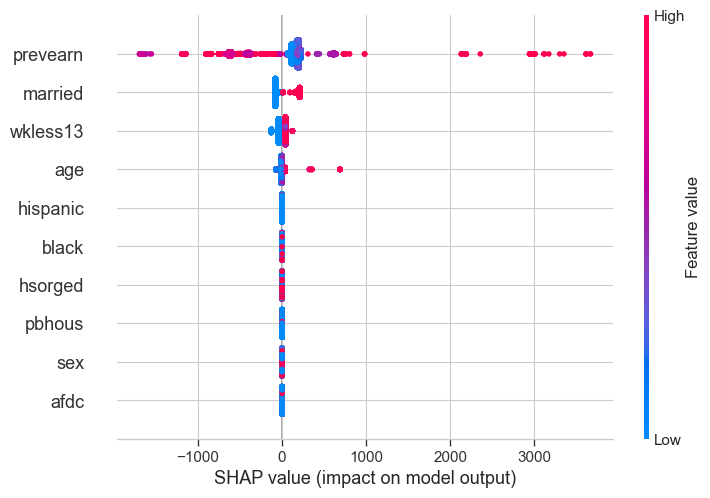

In [41]:
shap.plots.beeswarm(tot_SHAP_tpd)

Looks pretty identical to the interventional one!

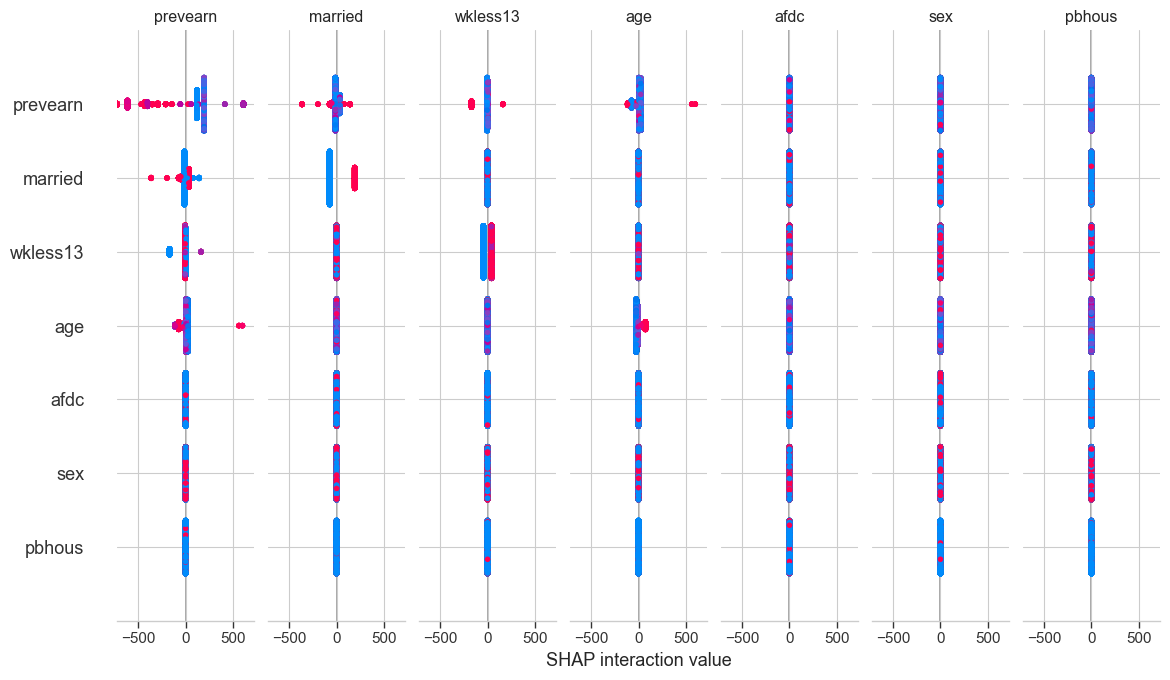

In [42]:
# get plot of interaction of prevearn and married
shap.summary_plot(tot_SHAP_interactions_tpd,X_sub)

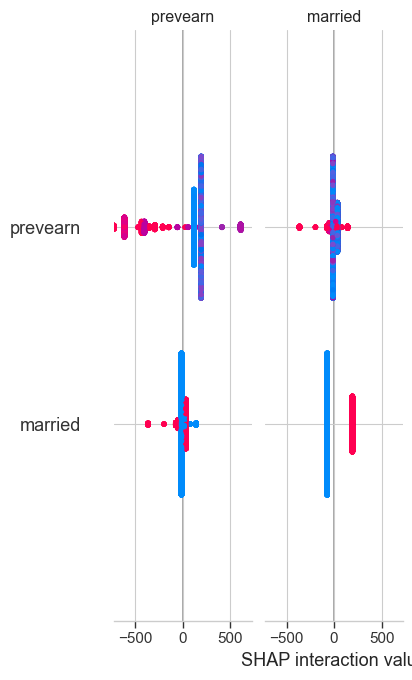

In [43]:
# get interaction summary of prevearn and married

# get subset of tot_SHAP_interactions_tpd
feature_names = ["married", "prevearn"]
i, j = [X_sub.columns.get_loc(name) for name in feature_names]

interaction_values_ij = tot_SHAP_interactions_tpd[:, [i, j], :][:, :, [i, j]]
shap.summary_plot(interaction_values_ij,X_sub[['married', 'prevearn']])

Note that on the diagonal you have the "Main effects". The overall SHAP value is the sum of the main plus all the interaction effects. The interaction seems to happen between marriage and previous earnings, so lets focus on that:

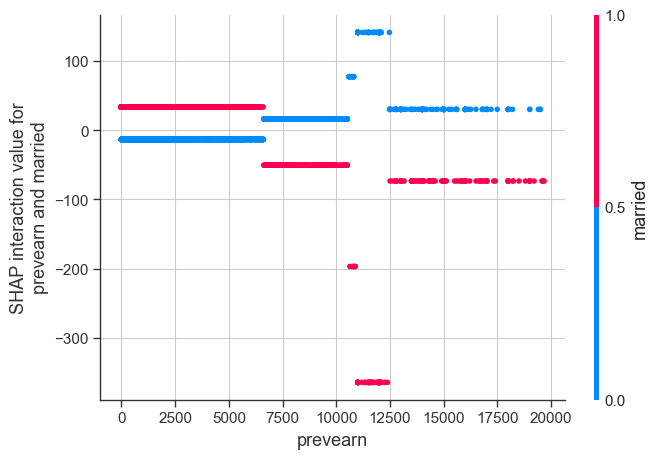

In [44]:
shap.dependence_plot(("prevearn", "married"), tot_SHAP_interactions_tpd, X_sub)

If the person is married, the married.prevearnings interaction first decreases, then increases. For an unmarried person, it first stays constant, then decreases.

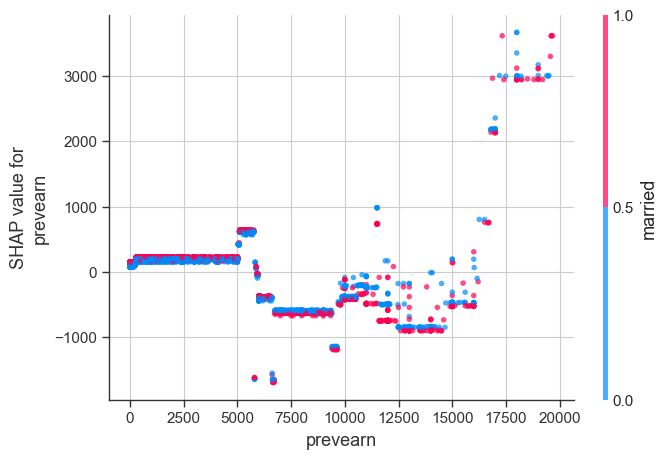

In [45]:
# overall effect can be seen in dependence plot
shap.dependence_plot("prevearn", tot_SHAP_tpd.values, X_sub, interaction_index="married",alpha=0.7)

The main effect of marriage overall is clearly positive (as we could see from the grid summary plot). For lower/medium previous earnings, we find that the interaction effect goes in the other direction, so the overall effect of moving from unmarried to married in that previous earnings window . For very high previous earnings, the interaction effect and main effect of marriage go into the same positive direction.

### econML Causal Forest

Since the data comes from a random experiment we do not need to concern ourselves with doubly robust estimation of the propensity score.

I will first consider a Causal Forest where I treat assignment as my treatment, and then an IV causal forest where I treat assignment as an instrument for enrollment.

### grf.CausalForest

In [25]:
from econml.grf import CausalForest

# define model
cf = CausalForest(min_samples_leaf=12, min_var_fraction_leaf = 0.1, random_state=1234) # other default settings are sensible imo
cf_fancy = CausalForest(min_samples_leaf=12, min_var_fraction_leaf = 0.1, random_state=1234) # other default settings are sensible imo

# not sure how to do GridSearch - sklearn default does not work because its missing a scoring mechanism,
# and econML GridSearchCVList seems to only be a list extension of the sklearn version.
# in the demo notebook https://github.com/py-why/EconML/blob/main/notebooks/Generalized%20Random%20Forests.ipynb they also dont do any model selection...
# I would think that "honest" estimation basically ensures that overfitting in the traditional sense doesnt happen...

# fit model
cf.fit(X=df[features], T=df.assignmt, y = df.earnings)
cate_cf, lb, ub = cf.predict(X=df[features], interval=True, alpha=0.01)
cf_fancy.fit(X = df_fancy[features_str], T = df_fancy.assignmt, y = df_fancy.earnings)

CausalForest(min_samples_leaf=12, min_var_fraction_leaf=0.1, random_state=1234)

In [20]:
# add to df
df["CATE_cf"] = cate_cf
df["CATE_cf_lb"] = lb
df["CATE_cf_ub"] = ub

Text(0.5, 1.0, 'Causal Forest give a much more balanced spectrum of CATEs')

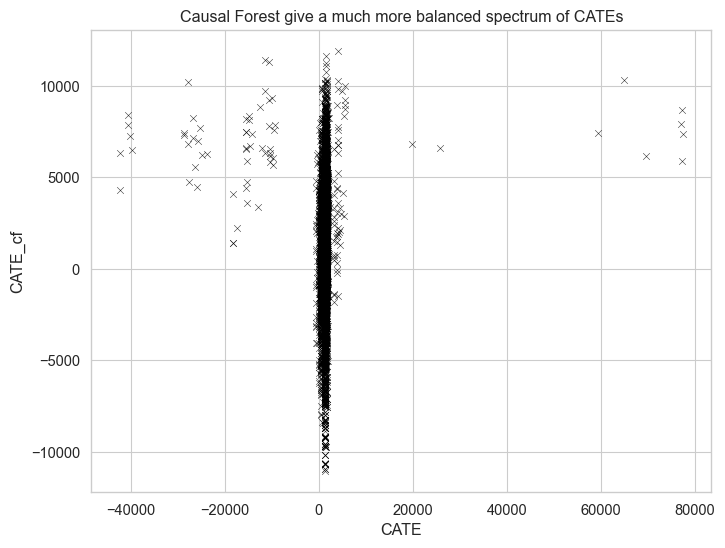

In [48]:
sns.scatterplot(x="CATE", y="CATE_cf", data=df, color = "black", alpha = 0.8, marker="x")
plt.title("Causal Forest give a much more balanced spectrum of CATEs")

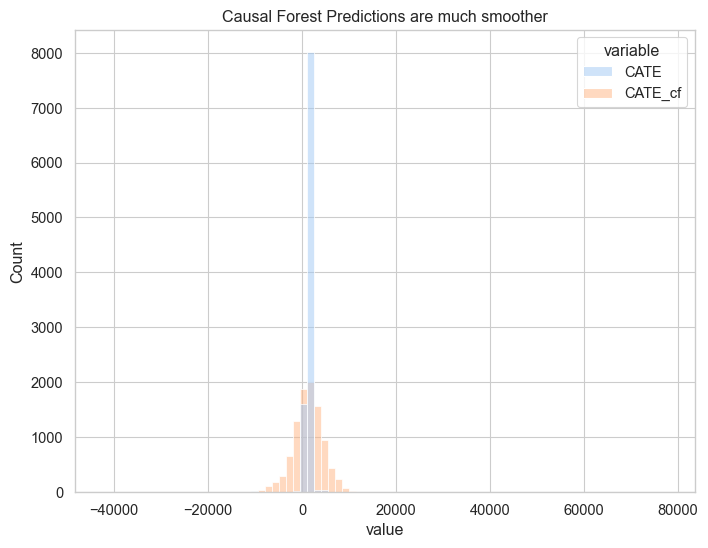

In [49]:
# get histogram of CF CATEs
cate_df = df[["CATE", "CATE_cf"]].melt()
sns.histplot(cate_df, x="value", hue="variable", bins = 80)
plt.title("Causal Forest Predictions are much smoother")
plt.show()

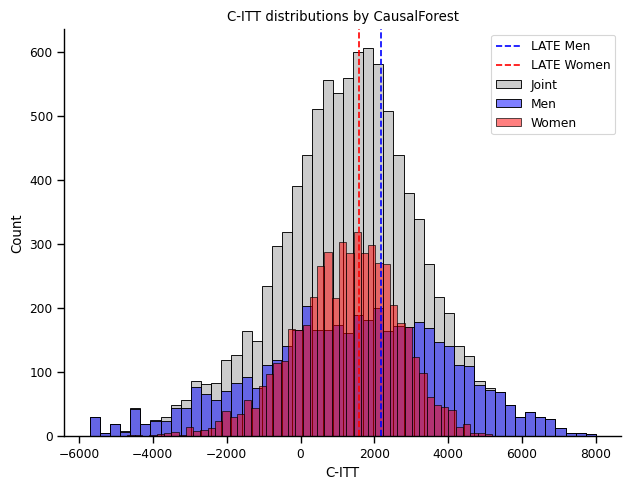

In [21]:
# plot distribution of CATEs overall, and for women and men separately in nicely formatted plot
sns.set_context("paper")
sns.histplot(df, x="CATE_cf", label = "Joint", alpha = 0.4, color="grey", bins = 50)
sns.histplot(df.query("sex==1"), x="CATE_cf", color="blue", alpha = 0.5, label = "Men", bins = 50)
sns.histplot(df.query("sex==0"), x="CATE_cf", color="red", alpha = 0.5, label = "Women", bins = 50)
# add axvlines for LATE estimates
plt.axvline(x=2190, color="blue", linestyle="--", label="LATE Men", ls = "--")
plt.axvline(x=1577, color="red", linestyle="--", label="LATE Women", ls = "--")
sns.despine()
plt.tight_layout()
plt.title("C-ITT distributions by CausalForest")
plt.xlabel("C-ITT")
plt.legend()

#plt.savefig("C-ITT.pdf", format='pdf', dpi=400)

plt.show()

/var/folders/yx/_8fch6cj6w5cfvy2xlfjrsyw0000gn/T/ipykernel_4717/2457957049.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df["age_bin_median"] = df.groupby("age_bin")["age"].transform("median")
/var/folders/yx/_8fch6cj6w5cfvy2xlfjrsyw0000gn/T/ipykernel_4717/2457957049.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df["prevearn_bin_median"] = df.groupby("prevearn_bin")["prevearn"].transform("median")


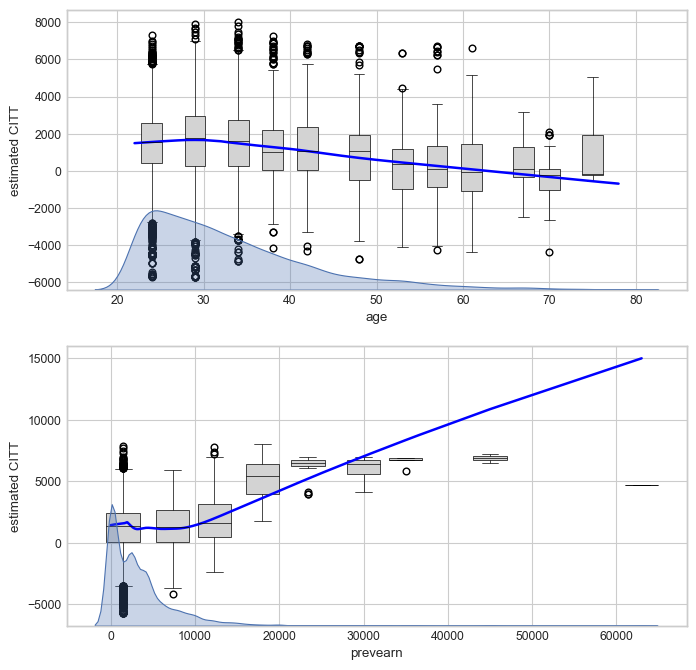

In [26]:
# same plot as before but create bins and plot boxplot for each bin

nr_bins = 12

# create bins and get median for each bin
df["age_bin"] = pd.cut(df.age, bins=nr_bins)
df["age_bin_median"] = df.groupby("age_bin")["age"].transform("median")
df["prevearn_bin"] = pd.cut(df.prevearn, bins=nr_bins)
df["prevearn_bin_median"] = df.groupby("prevearn_bin")["prevearn"].transform("median")

# plot
f, axs = plt.subplots(2, 1, figsize=(8, 8))
ax2 = axs[0].twinx()
ax2.set_ylim(0, 0.2)
sns.kdeplot(df["age"], ax=ax2, fill=True, alpha=0.3)
ax2.yaxis.set_visible(False)
ax2.grid(False)
sns.boxplot(x="age_bin_median", y="CATE_cf", data=df, ax=axs[0], 
            color = "lightgrey", linecolor="black", native_scale=True, linewidth=0.5)
sns.regplot(x="age", y="CATE_cf", data=df, scatter=False, ax=axs[0], color = "blue", lowess=True)

ax3 = axs[1].twinx()
ax3.set_ylim(0, 0.0005)
sns.kdeplot(df["prevearn"], ax=ax3, fill=True, alpha=0.3)
ax3.yaxis.set_visible(False)
ax3.grid(False)
sns.boxplot(x="prevearn_bin_median", y="CATE_cf", data=df, ax=axs[1], 
            color = "lightgrey", linecolor="black", native_scale=True, linewidth=0.5)
sns.regplot(x="prevearn", y="CATE_cf", data=df, scatter=False, lowess=True, color="blue", ax=axs[1])

# set y title
axs[0].set_ylabel("estimated CITT")
axs[1].set_ylabel("estimated CITT")

# save fig
plt.savefig("CATE_by_age_prev_earn.pdf", format='pdf', dpi=400)

plt.show()

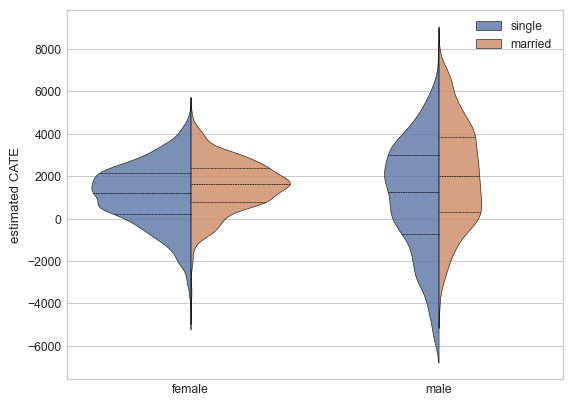

In [28]:
# plot across sex, married and education

# create binary str
df["married_str"] = df.married.map({0:"single", 1:"married"})
df["gender_str"] = df.sex.map({0:"female", 1:"male"})


sns.violinplot(y = "CATE_cf", x = "gender_str", hue="married_str", data=df, linewidth=0.5, linecolor="black", alpha = 0.8, split=True, inner="quart")
plt.ylabel("estimated CATE")
plt.xlabel("")
plt.legend()

# save fig
plt.savefig("CATE_by_sex_and_married.pdf", format='pdf', dpi=400)

plt.show()

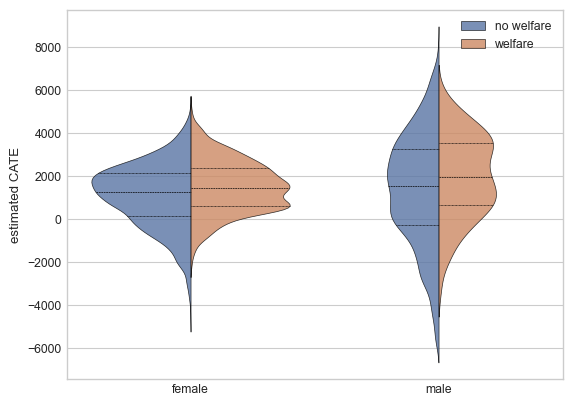

In [30]:
# plot across sex, married and education

# get welfare binary
df["afcd_str"] = df.afdc.map({0:"no welfare", 1:"welfare"})

sns.violinplot(y = "CATE_cf", x = "gender_str", hue="afcd_str", data=df, linewidth=0.5, linecolor="black", alpha = 0.8, split=True, inner="quart")
plt.ylabel("estimated CATE")
plt.xlabel("")
plt.legend()
plt.show()

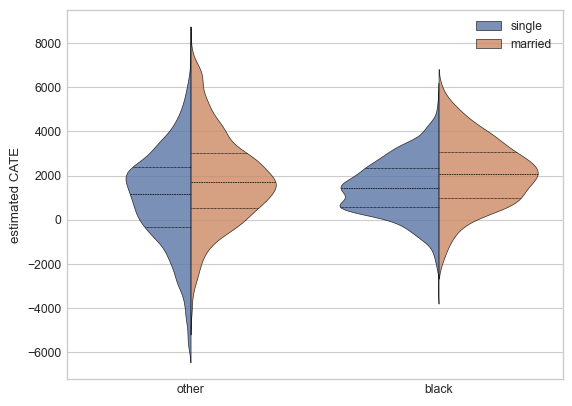

In [31]:
# get black binary
df["black_str"] = df.afdc.map({0:"other", 1:"black"})

sns.violinplot(y = "CATE_cf", x = "black_str", hue="married_str", data=df, linewidth=0.5, linecolor="black", alpha = 0.8, split=True, inner="quart")
plt.ylabel("estimated CATE")
plt.xlabel("")
plt.legend()
plt.show()

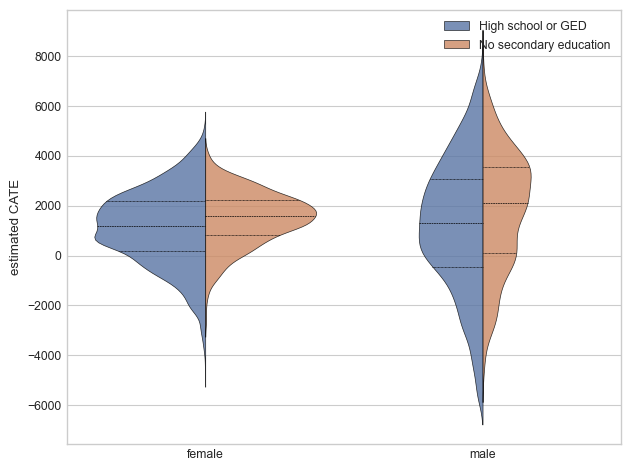

In [34]:
# educaiton binary
df["education_str"] = df.hsorged.map({0:"No secondary education", 1:"High school or GED"})

sns.violinplot(y = "CATE_cf", x = "gender_str", hue="education_str", data=df, linewidth=0.5, linecolor="black", alpha = 0.8, split=True, inner="quart")
plt.ylabel("estimated CATE")
plt.xlabel("")
plt.legend()
plt.tight_layout()
plt.show()

In [26]:
# apply SHAP
from shap.explainers import _tree # imports local fork
cf_treeExplainer = _tree.TreeExplainer(cf)
# get renamed dataframe
features = ['afdc', 'sex', 'married', 'pbhous', 'hsorged', 'black', 'hispanic', 'wkless13','age', 'prevearn']
features_str = ["welfare", "sex", "married", "public housing", "high school", "black", "hispanic", "unemployed", "age", "previous earnings"]
df_renamed = df.rename(columns=dict(zip(features, features_str)))

In [27]:
cf_fancy_treeExplainer = _tree.TreeExplainer(cf_fancy)
cf_fancy_SHAP = cf_fancy_treeExplainer(df_fancy[features_str])

In [29]:
import pickle
with open("cf_fancy_SHAP.pkl", "wb") as f:
    pickle.dump(cf_fancy_SHAP, f)

In [20]:
cf_SHAP = cf_treeExplainer(df[features])
cf_SHAP_sub = cf_treeExplainer(df[features].sample(1000))

In [37]:
# save SHAP explanation object
import pickle
with open("cf_SHAP.pkl", "wb") as f:
    pickle.dump(cf_SHAP, f)

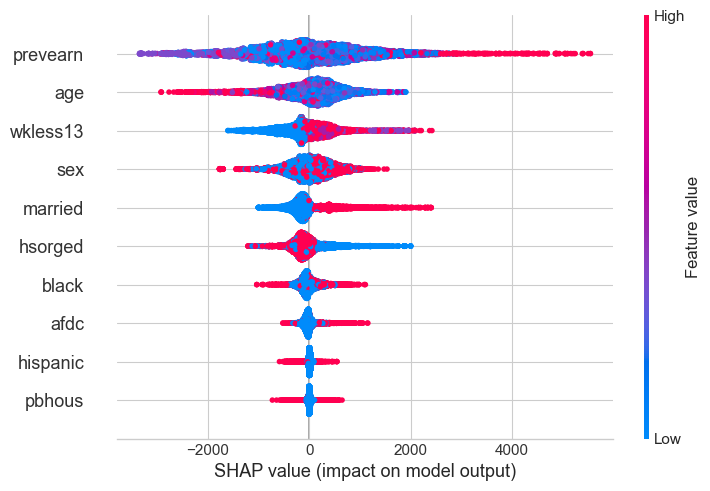

In [21]:
# plot
import shap
shap.plots.beeswarm(cf_SHAP, max_display=12)

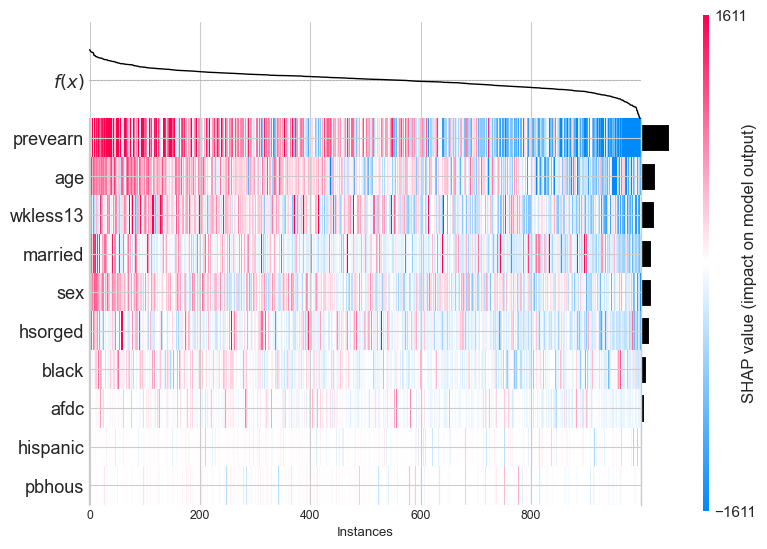

In [19]:
shap.plots.heatmap(cf_SHAP_sub, instance_order=cf_SHAP_sub.sum(1))

We find that for many binary characteristics the spread of SHAP values, and hence spread of impact on predictions, is larger for one category: 
- Being hispanic or black implies a larger spread, and so does public housing. 
- Being married has a clear positive effect, and age appears to have a slight negative effect.

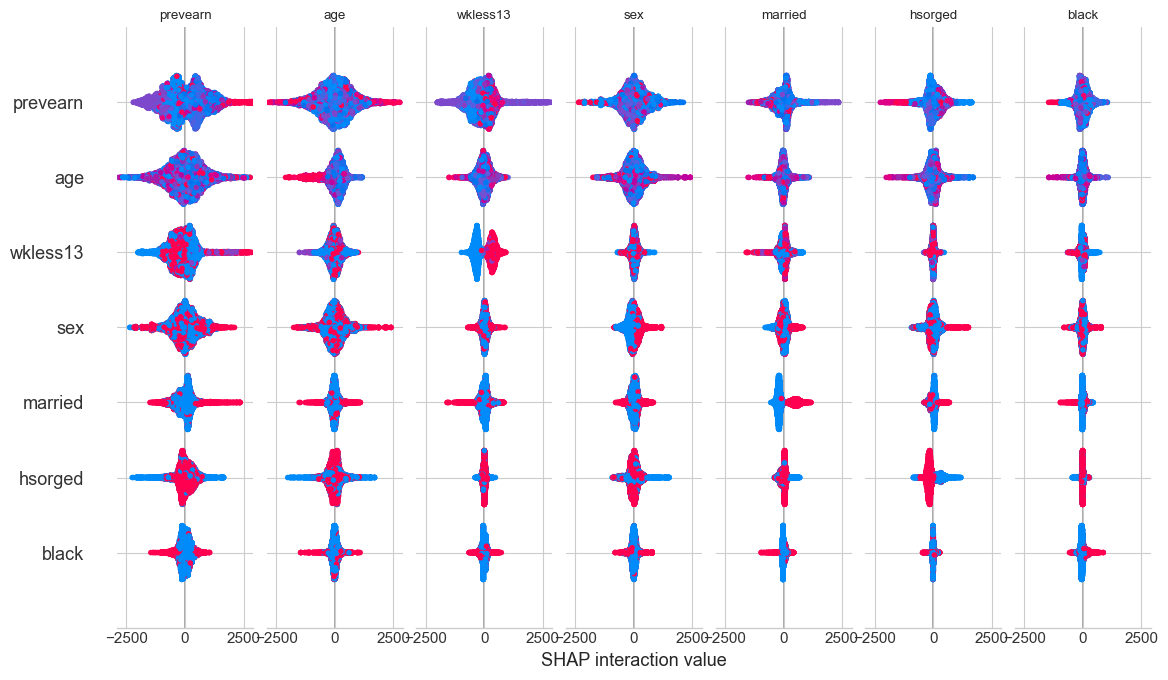

In [39]:
import numpy as np
# finding interaction values
cf_SHAP_interactions = cf_treeExplainer.shap_interaction_values(df[features])
np.save("cf_SHAP_interactions.npy", cf_SHAP_interactions)
shap.summary_plot(cf_SHAP_interactions, df[features])

Most variables strongly interact with marriage. Especially the iSHAP value for sex seems vary more for married people. There are also interesting interactions between the iSHAP for previous earnings by high school degree: for those who do not have a degree, the impact of previous earnings is much more spread that for those that do.

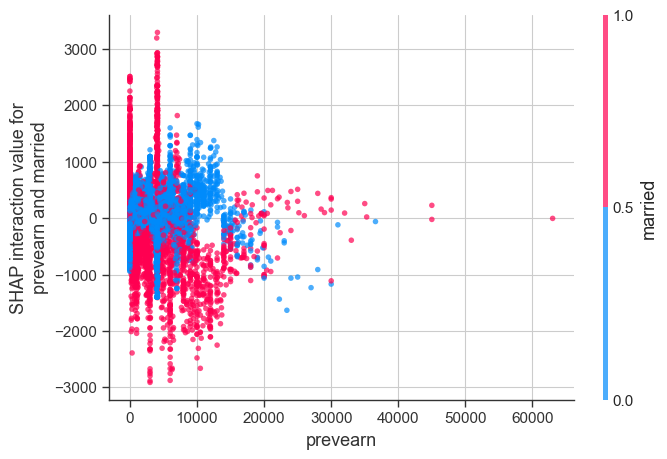

In [71]:
# interaction between prevearn and marriage
shap.dependence_plot(("prevearn", "married"), cf_SHAP_interactions, df[features], alpha = 0.7)

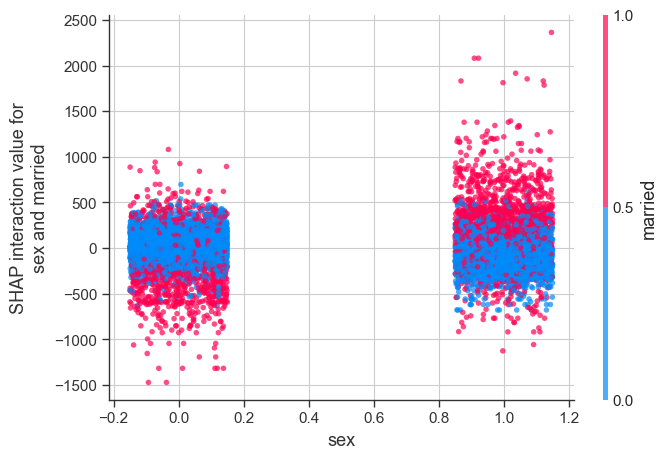

In [73]:
# shap interaction between sex and marriage
shap.dependence_plot(("sex", "married"), cf_SHAP_interactions, df[features], x_jitter=0.3, alpha = 0.7)

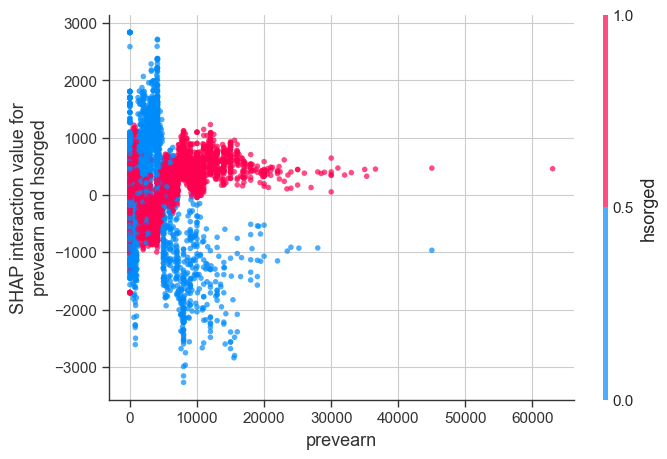

In [74]:
# interaction between previous earnings and high school degree
shap.dependence_plot(("prevearn", "hsorged"), cf_SHAP_interactions, df[features], alpha = 0.7)

Let's now look at the SHAP values for the most and least affected groups.

In [55]:
# get df of cf_SHAP
cf_SHAP_df = pd.DataFrame(cf_SHAP.values, columns = features, index=df.index)

# group with the highest 100 CATEs
top = df.sort_values("CATE_cf", ascending=False).head(10)
top.head(10)

,radate,assignmt,site,training,afdc,sex,class_tr,ojt_jsa,oth_serv,bdate,...,age3644,age4554,f2sms,wkless13,sex_str,earnings_transformed,CATE,CATE_cf,CATE_cf_lb,CATE_cf_ub
recid,,,,,,,,,,,,,,,,,,,,,
304052,07/19/88,1,LC,1,0,1,0,0,1,04/04/47,...,1,0,0,0.0,male,64579.522713,7172.641333,13642.995928,2206.709238,25079.282617
305099,05/13/88,1,IN,1,0,1,1,0,0,08/20/30,...,0,0,1,0.0,male,126237.341621,864.255169,13497.069352,941.458940,26052.679764
300259,03/29/89,0,CI,0,0,1,1,0,0,03/14/48,...,1,0,0,0.0,male,-0.000000,7172.641333,13386.619673,3107.601692,23665.637655
304672,02/19/88,1,CV,1,0,1,0,1,0,06/19/47,...,1,0,0,0.0,male,62414.411602,1417.349469,13192.414758,1679.109117,24705.720399
315477,06/09/88,0,SM,0,0,1,1,0,0,01/31/48,...,1,0,0,0.0,male,-2989.020762,1417.349469,13192.414758,1679.109117,24705.720399
315690,01/11/89,1,IN,1,0,1,0,1,0,08/17/48,...,1,0,0,0.0,male,101580.793125,7450.537971,13105.937507,-1280.505526,27492.380539
303155,08/11/88,1,CC,0,0,1,0,1,0,03/25/46,...,1,0,0,0.0,male,30449.117864,7172.641333,12966.584570,-1348.557015,27281.726155
314164,12/10/87,0,MD,0,0,1,0,0,1,06/08/27,...,0,0,0,0.0,male,-111508.589712,6897.443670,12944.650727,-1756.051641,27645.353095
306140,03/17/89,0,IN,0,0,1,0,1,0,05/13/28,...,0,0,1,0.0,male,-0.000000,864.255169,12710.666699,-5025.863322,30447.196721


Traditionally we could now look at if they all share some common characteristics, e.g. find they are almost all male. However, it would be more interesting to have a quantitative decomposition of how relevant the fact that they are all male is. Does it make up 50% of their prediction? or 1%?

In [56]:
# compare characteristics
comp = pd.DataFrame({"all" : df[features].mean(), "top": top[features].mean()})
comp

,all,top
afdc,0.181772,0.0
sex,0.464025,1.0
married,0.284204,0.8
pbhous,0.084574,0.0
hsorged,0.717438,1.0
black,0.251565,0.0
hispanic,0.100688,0.0
wkless13,0.453097,0.0
age,33.022170,47.1
prevearn,3281.830515,17013.1


In [57]:
# get shap values for this group
top_indices = top.index
top_SHAP = cf_SHAP_df.loc[top_indices]

In [58]:
top_SHAP.abs().mean().sort_values(ascending=False)

prevearn    7427.686102
age         1766.383495
sex          746.129877
hsorged      501.727399
married      288.489774
wkless13     100.396151
black         78.306540
hispanic      23.911271
afdc          13.136795
pbhous         5.403658
dtype: float64

In [59]:
# get row numbers of top_indices
n_indices = [df.index.get_loc(i) for i in top_indices]
n_indices

[1915, 2430, 121, 2219, 7367, 7463, 1478, 6713, 2913, 1419]

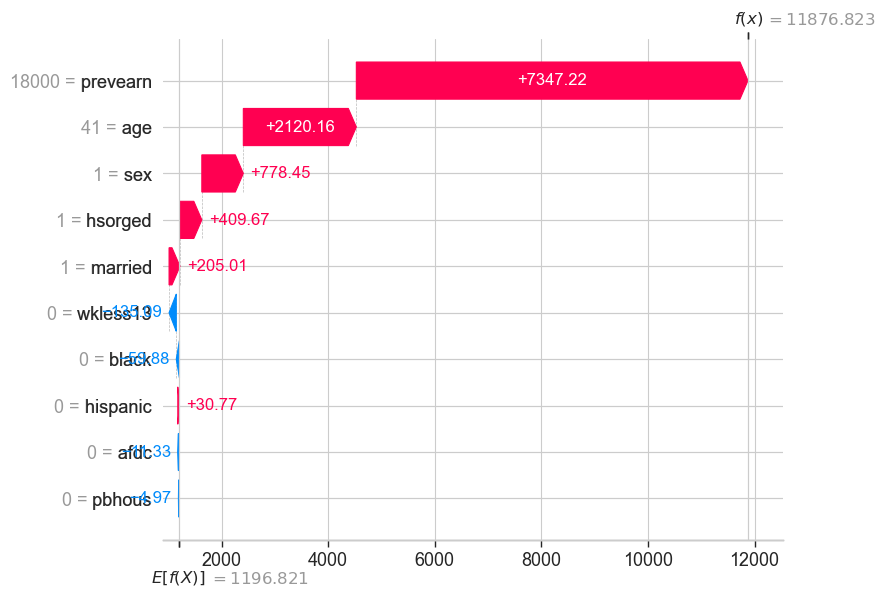

In [60]:
# get waterfall plot for one of the top
shap.waterfall_plot(cf_SHAP[n_indices[0]])

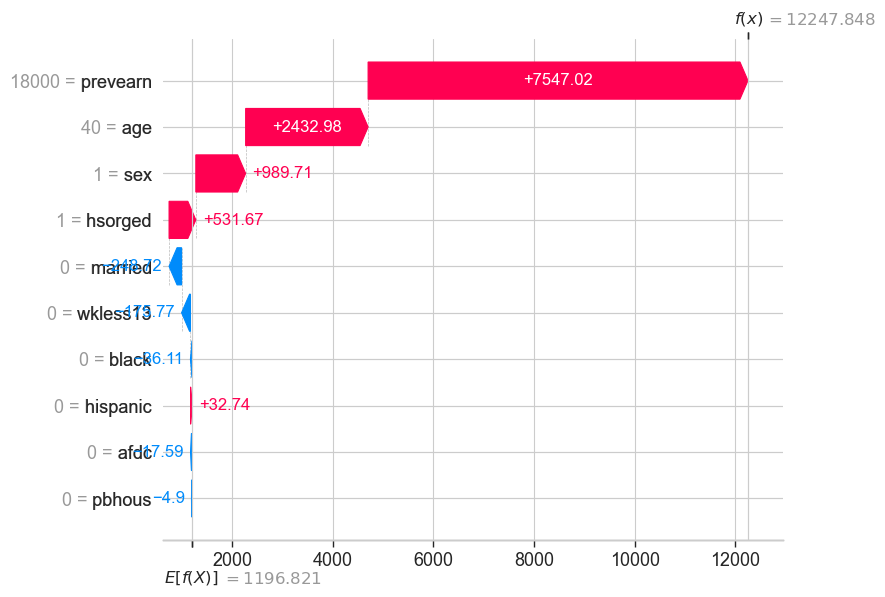

In [61]:
shap.waterfall_plot(cf_SHAP[n_indices[5]])

In [62]:
# lets look in turn at the worst 10
bottom = df.sort_values("CATE_cf", ascending=True).head(10)

# get shap values for this group
bottom_indices = bottom.index
bottom_SHAP = cf_SHAP_df.loc[bottom_indices]

bottom_SHAP.abs().mean().sort_values(ascending=False)

prevearn    4079.269496
age         2942.307670
sex         2186.181923
hsorged     1001.614062
married      525.163799
black        448.584492
wkless13     328.225511
afdc         246.548816
hispanic     110.804637
pbhous        67.362502
dtype: float64

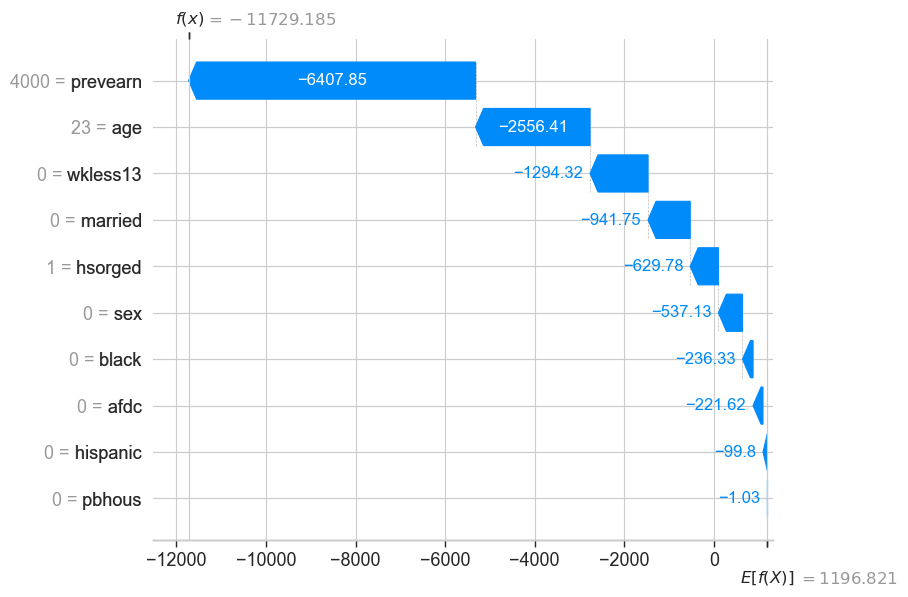

In [63]:
# get row numbers of bottom_indices
n_indices = [df.index.get_loc(i) for i in bottom_indices]
# plot waterfall plot for one of the worst
shap.waterfall_plot(cf_SHAP[n_indices[0]])

Being workless leads to a lower effect of assignment? That seems counter intuitive.

In [64]:
bottom[features].mean()

afdc          0.0
sex           0.9
married       0.0
pbhous        0.0
hsorged       1.0
black         0.0
hispanic      0.0
wkless13      0.9
age          30.0
prevearn    400.0
dtype: float64

8 out of the 10 were workless, so the above is an exception.

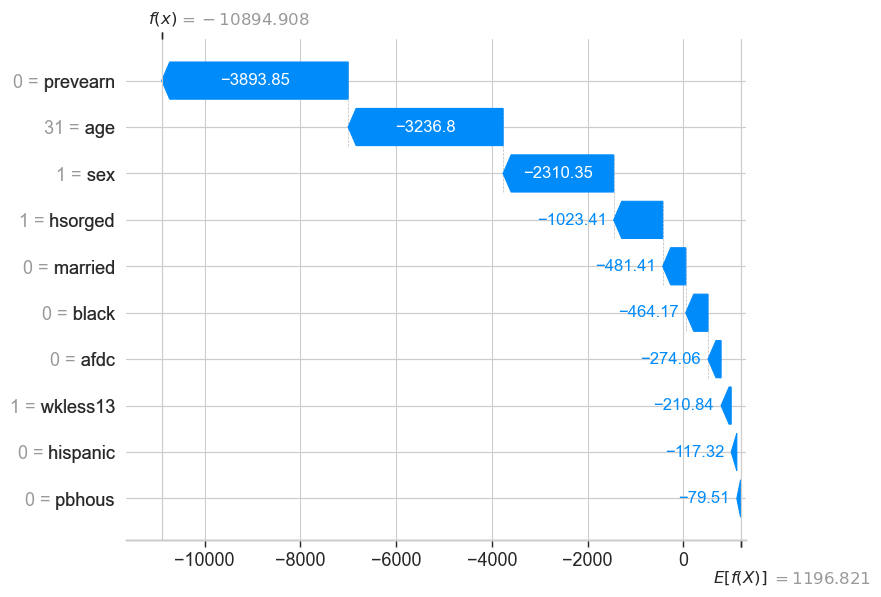

In [65]:
# plot another
shap.waterfall_plot(cf_SHAP[n_indices[5]])

Could also find those for which e.g.
- married has the biggest impact

-> Looking at individual instances probably always carries some risk of finding spurious result from overfitting... Might be more powerful to look at dependency plots and overall SHAP distributions

### grf.CausalIVForest

Lets now move to the IV causal forest, where we use assignment as an instrument for enrollment.

In [43]:
from econml.grf import CausalIVForest

# define model
cf_iv = CausalIVForest(min_samples_leaf=12, min_var_fraction_leaf = 0.1, random_state=1234) # default settings are sensible imo

# fit model
cf_iv.fit(y=df.earnings, T=df.training, X=df[features], Z=df.assignmt)

CausalIVForest(min_samples_leaf=12, min_var_fraction_leaf=0.1,
               random_state=1234)

In [44]:
cf_iv_cate, lb, ub = cf_iv.predict(X=df[features], interval=True, alpha = 0.01)
# add to df
df["CATE_cf_iv"] = cf_iv_cate
df["CATE_cf_iv_lb"] = lb
df["CATE_cf_iv_ub"] = ub

In [45]:
df[["CATE_cf_iv","CATE_cf_iv_lb","CATE_cf_iv_ub"]].sample(10)

,CATE_cf_iv,CATE_cf_iv_lb,CATE_cf_iv_ub
recid,,,
310400,3921.719833,-3763.092642,11606.532308
300444,3778.208269,-6595.663874,14152.080411
311700,1482.740712,-2757.609037,5723.090460
319655,2062.239119,-2996.386702,7120.864939
317451,6287.904427,1418.122298,11157.686557
316663,3450.696816,-2888.480890,9789.874523
315762,-1303.658302,-9022.655760,6415.339157
317605,4232.171012,-305.282844,8769.624868
313432,7307.151395,1947.189533,12667.113258


In [51]:
# put indicator for whether neg_sign or pos_sign
df["CATE_cf_pos_sign"] = df["CATE_cf_lb"]>0
df["CATE_cf_neg_sign"] = df["CATE_cf_ub"]<0
# get sum for each
df[["CATE_cf_pos_sign", "CATE_cf_neg_sign"]].sum()

CATE_cf_pos_sign    388
CATE_cf_neg_sign     12
dtype: int64

In [52]:
# put indicator for whether neg_sign or pos_sign
df["CATE_cf_iv_pos_sign"] = df["CATE_cf_iv_lb"]>0
df["CATE_cf_iv_neg_sign"] = df["CATE_cf_iv_ub"]<0
df[["CATE_cf_iv_pos_sign", "CATE_cf_iv_neg_sign"]].sum()

CATE_cf_iv_pos_sign    427
CATE_cf_iv_neg_sign     14
dtype: int64

In [130]:
# top 10 most affected 
top_iv = df.sort_values("CATE_cf_iv", ascending=False).head(10)
top_iv

,radate,assignmt,site,training,afdc,sex,class_tr,ojt_jsa,oth_serv,bdate,...,prevearn_bin_median,married_str,gender_str,afcd_str,black_str,education_str,CATE_cf_iv,CATE_cf_iv_lb,CATE_cf_iv_ub,CATE_cf_iv_significant
recid,,,,,,,,,,,,,,,,,,,,,
314388,03/31/89,1,LC,1,0,1,1,0,0,04/29/52,...,35000.0,married,male,no welfare,other,High school or GED,20289.952869,2228.985357,38350.920380,True
301049,06/23/89,1,IN,0,0,1,0,1,0,07/09/48,...,35000.0,married,male,no welfare,other,High school or GED,20091.837646,-6512.034942,46695.710233,False
302816,09/12/89,1,LC,0,0,1,0,0,1,02/21/50,...,30000.0,married,male,no welfare,other,High school or GED,20079.551960,-2024.623328,42183.727248,False
310643,09/13/89,1,LC,1,0,1,0,0,1,11/26/46,...,30000.0,married,male,no welfare,other,High school or GED,20047.140862,-7626.019008,47720.300731,False
304224,08/03/88,1,IN,1,0,1,0,1,0,12/03/45,...,30000.0,married,male,no welfare,other,High school or GED,20047.140862,-7626.019008,47720.300731,False
301336,07/12/88,0,LC,0,0,1,0,0,1,08/25/47,...,23395.0,married,male,no welfare,other,High school or GED,20023.139997,-5854.240108,45900.520102,False
302272,12/22/88,1,SM,1,0,1,0,1,0,05/13/50,...,23395.0,married,male,no welfare,other,High school or GED,19761.159101,-3291.014195,42813.332396,False
313239,08/04/88,0,SM,0,0,1,0,1,0,11/12/50,...,30000.0,married,male,no welfare,other,High school or GED,19554.920362,3871.530945,35238.309780,True
302076,03/24/89,1,IN,0,0,1,0,1,0,10/21/50,...,45000.0,married,male,no welfare,other,High school or GED,19505.947629,-5332.684477,44344.579734,False


use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


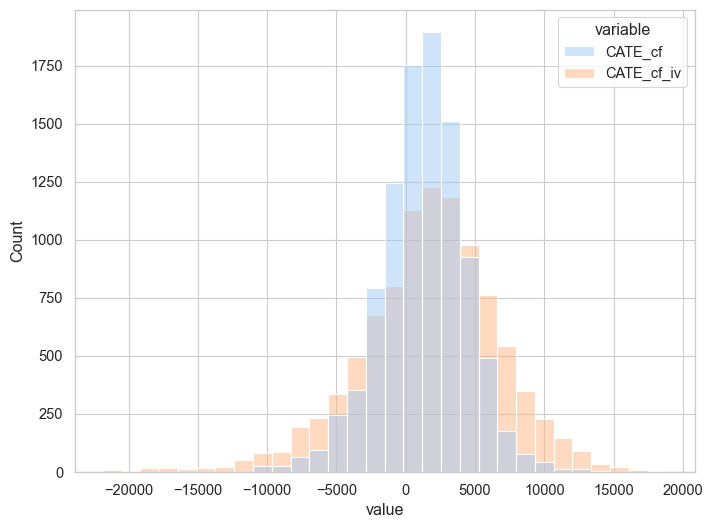

In [68]:
# compare hist of CATEs from CVs
cate_df = df[["CATE_cf", "CATE_cf_iv"]].melt()
sns.histplot(cate_df, x="value", hue="variable", bins = 30)
plt.show()

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


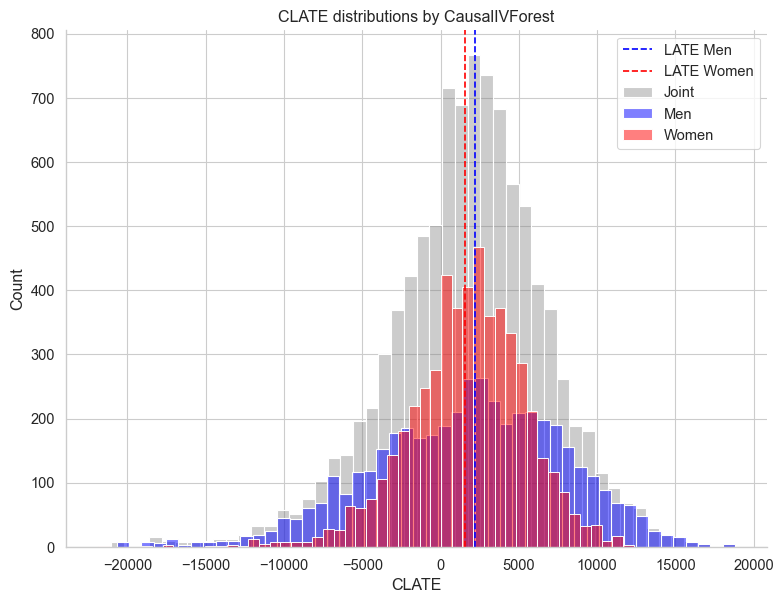

In [69]:
# plot distribution of CATEs overall, and for women and men separately in nicely formatted plot
sns.histplot(df, x="CATE_cf_iv", label = "Joint", alpha = 0.4, color="grey", bins = 50)
sns.histplot(df.query("sex==1"), x="CATE_cf_iv", color="blue", alpha = 0.5, label = "Men", bins = 50)
sns.histplot(df.query("sex==0"), x="CATE_cf_iv", color="red", alpha = 0.5, label = "Women", bins = 50)
# add axvlines for LATE estimates
plt.axvline(x=2190, color="blue", linestyle="--", label="LATE Men", ls = "--")
plt.axvline(x=1577, color="red", linestyle="--", label="LATE Women", ls = "--")
sns.despine()
plt.tight_layout()
plt.title("CLATE distributions by CausalIVForest")
plt.xlabel("CLATE")
plt.legend()

#plt.savefig("CATE_CF_IV.pdf", format='pdf', dpi=400)

plt.show()

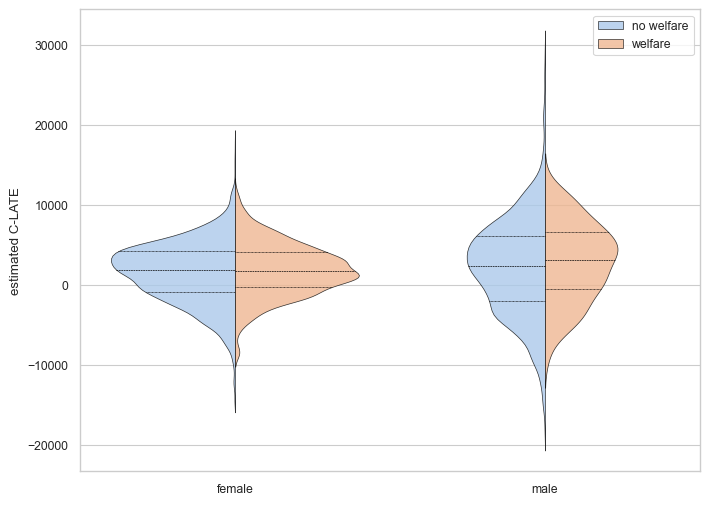

In [118]:
# plot across sex, married and education

# get welfare binary

sns.violinplot(y = "CATE_cf_iv", x = "sex_str", hue="afcd_str", data=df, linewidth=0.5, linecolor="black", alpha = 0.8, split=True, inner="quart")
plt.ylabel("estimated C-LATE")
plt.xlabel("")
plt.legend()

# save fig
plt.savefig("CATE_by_sex_and_welfare.pdf", format='pdf', dpi=400)

plt.show()

In [53]:
# get SHAP
from shap.explainers import _tree # imports local fork
import shap # for plotting

cf_iv_treeExplainer = _tree.TreeExplainer(cf_iv)
cf_iv_SHAP = cf_iv_treeExplainer(df[features])

In [83]:
type(cf_iv)

econml.grf.classes.CausalIVForest

In [88]:
type(cf_iv.estimators_[0].tree_)

econml.tree._tree.Tree

I added this type to the acceptable class of tre

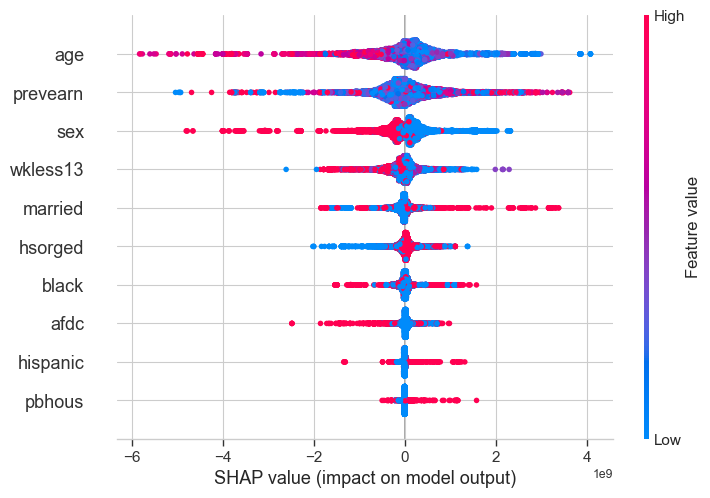

In [92]:
# summary plot
shap.plots.beeswarm(cf_iv_SHAP, max_display=12)

In [136]:
cf_iv_SHAP_values = cf_iv_treeExplainer.shap_values(X = df[features])

Within the subgroup of female afcd recipients (welfare mothers), those who were recommended for the OJT_job search assistance strategy appeared to experience the largest impact by far.

Let's see if we can see this interaction effect in the SHAP values.

In [54]:
# interactions
cf_iv_SHAP_interactions = cf_iv_treeExplainer.shap_interaction_values(df[features])
np.save("cf_iv_SHAP_interactions.npy", cf_iv_SHAP_interactions)
# cf_iv_SHAP_interactions = np.load("cf_iv_SHAP_interactions.npy")

In [ ]:
# print summary plot
shap.summary_plot(cf_iv_SHAP_interactions, df[features])

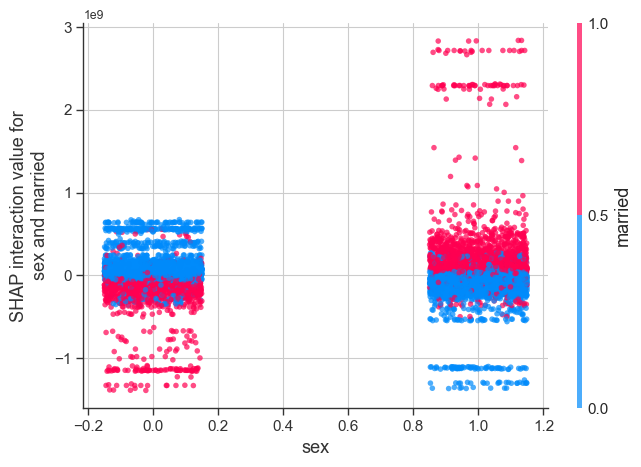

In [81]:
# shap interaction between sex and marriage
shap.dependence_plot(("sex", "married"), cf_iv_SHAP_interactions, df[features], x_jitter=0.3, alpha = 0.7)

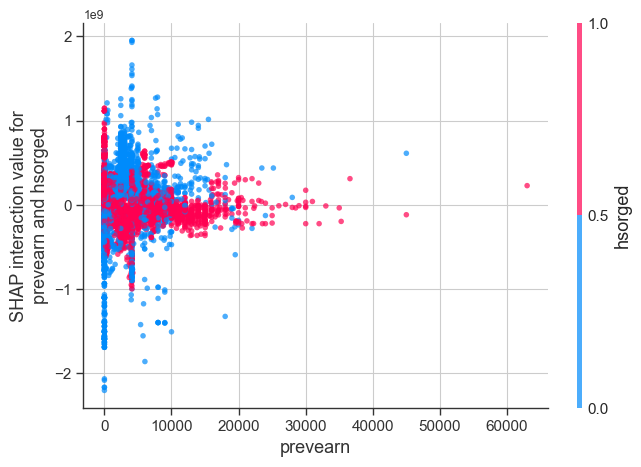

In [82]:
# shap interaction between sex and marriage
shap.dependence_plot(("prevearn", "hsorged"), cf_iv_SHAP_interactions, df[features], x_jitter=0.3, alpha = 0.7)

save objects

In [55]:
# save all 4 sets of SHAP values
cf_SHAP_df = pd.DataFrame(cf_SHAP.values, columns = features, index=df.index)
cf_SHAP_df.to_csv("cf_SHAP_values.csv")

In [57]:
# create df of cf_SHAP_iv

cf_iv_SHAP_df = pd.DataFrame(cf_iv_SHAP.values, columns = features, index=df.index)
cf_iv_SHAP_df.to_csv("cf_iv_SHAP_values.csv")

In [58]:
df.to_csv("final_df.csv")